<a href="https://colab.research.google.com/github/ankitarashmi/EVAAssignments/blob/master/ImageNormANDReg_Session5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator #Data Generater
from keras import regularizers #Regularizer
from keras.callbacks import ModelCheckpoint #Checkpoints

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


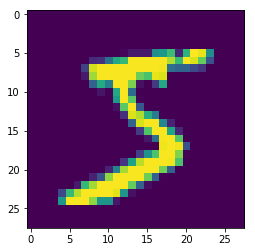

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#Image Normalization


In [20]:
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True) #generates batches of real time augmented images

datagen.fit(X_train) #computes mean and std deviation for normalization
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))



Statistics train=33.318 (78.567), test=33.791 (79.172)
Data Generator mean=33.318, std=78.567


In [22]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#Added regularizer(L2) and ReLu after Normalization

In [10]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(12, 3, 3, kernel_regularizer=regularizers.l2(0.01), input_shape=(28,28,1))) #(26,26,12) RF:3X3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(14, 3, 3,kernel_regularizer=regularizers.l2(0.01))) #(24,24,14) RF:5X5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01))) #(22,22,16) RF:7X7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(MaxPooling2D())
model.add(Convolution2D(12, 1, kernel_regularizer=regularizers.l2(0.01)))  #(11,11,12) RF :7X7
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(14, 3,3, kernel_regularizer=regularizers.l2(0.01))) #(9,9,14) RF:9X9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01)))#(7,7,16) RF:13X13
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))



model.add(Convolution2D(10, 1, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10,7))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), kernel_regularizer=<keras.reg...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 12)        120       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 12)        48        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 14)        1526      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 14)        56        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 14)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        2032      
__________

#Adding ModelCheckpoint for Saving the model with highest validation Accuracy

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])

filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max',save_weights_only=False)
callbacks_list = [checkpoint]

#Accuracy of 99.77

Using model.fit_generator in place of model.fit. Using the transformed train and test data after normalization.


In [12]:
#model.fit(X_train, Y_train, batch_size=512, nb_epoch=50,validation_data=(X_test,Y_test), verbose=1)

train_iterator = datagen.flow(X_train, Y_train, batch_size=512)
test_iterator = datagen.flow(X_test, Y_test, batch_size=512)


model.fit_generator(train_iterator,
	validation_data=test_iterator,validation_steps=len(X_test)/512, steps_per_epoch=len(X_train)/512 ,callbacks=callbacks_list,
	epochs=40)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
118/117 [==============================] - 7s 55ms/step - loss: 0.7712 - acc: 0.9040 - val_loss: 2.9058 - val_acc: 0.2670

Epoch 00001: val_acc improved from -inf to 0.26700, saving model to weights-improvement-01-0.27.hdf5
Epoch 2/40
118/117 [==============================] - 3s 26ms/step - loss: 0.1804 - acc: 0.9769 - val_loss: 2.9512 - val_acc: 0.2359

Epoch 00002: val_acc did not improve from 0.26700
Epoch 3/40
118/117 [==============================] - 3s 27ms/step - loss: 0.1207 - acc: 0.9800 - val_loss: 2.0690 - val_acc: 0.2407

Epoch 00003: val_acc did not improve from 0.26700
Epoch 4/40
118/117 [==============================] - 3s 27ms/step - loss: 0.1033 - acc: 0.9811 - val_loss: 0.4690 - val_acc: 0.8577

Epoch 00004: val_acc improved from 0.26700 to 0.85770, saving model to weights-improvement-04-0.86.hdf5
Epoch 5/40
118/117 [==============================] - 3s 28ms/step - loss: 0.0925 - acc: 0.9829 - val_loss: 0.4

#loading the model from the saved checkpoint.

In [0]:
from keras.models import load_model
modelPath = 'weights-improvement-34-0.99.hdf5'
model = load_model(modelPath)

score = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)

In [24]:
print(score)

[0.07437187094688416, 0.9868999995231629]


In [0]:
y_pred = model.predict(X_test)

In [16]:
print(y_pred[:9])
print(y_test[:9])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [5.4396495e-29 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  9.1272060e-19 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 3.4652327e-13 0.0000000e+00]
 [1.1301146e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.2747931e-35 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [18]:
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x7f7c2c1105f8>,
 'activation_2': <keras.layers.core.Activation at 0x7f7c0e7ebba8>,
 'activation_3': <keras.layers.core.Activation at 0x7f7c0e70c1d0>,
 'activation_4': <keras.layers.core.Activation at 0x7f7c0e5b4320>,
 'activation_5': <keras.layers.core.Activation at 0x7f7c0e4d92e8>,
 'activation_6': <keras.layers.core.Activation at 0x7f7c0e3a66d8>,
 'activation_7': <keras.layers.core.Activation at 0x7f7c0e287240>,
 'activation_8': <keras.layers.core.Activation at 0x7f7c0e19d978>,
 'batch_normalization_1': <keras.layers.normalization.BatchNormalization at 0x7f7c2ea13828>,
 'batch_normalization_2': <keras.layers.normalization.BatchNormalization at 0x7f7c2c110710>,
 'batch_normalization_3': <keras.layers.normalization.BatchNormalization at 0x7f7c0e7ebc18>,
 'batch_normalization_4': <keras.layers.normalization.BatchNormalization at 0x7f7c0e622438>,
 'batch_normalization_5': <keras.layers.normalization.BatchNormalization at 0x7f7c0e5b45c0>,

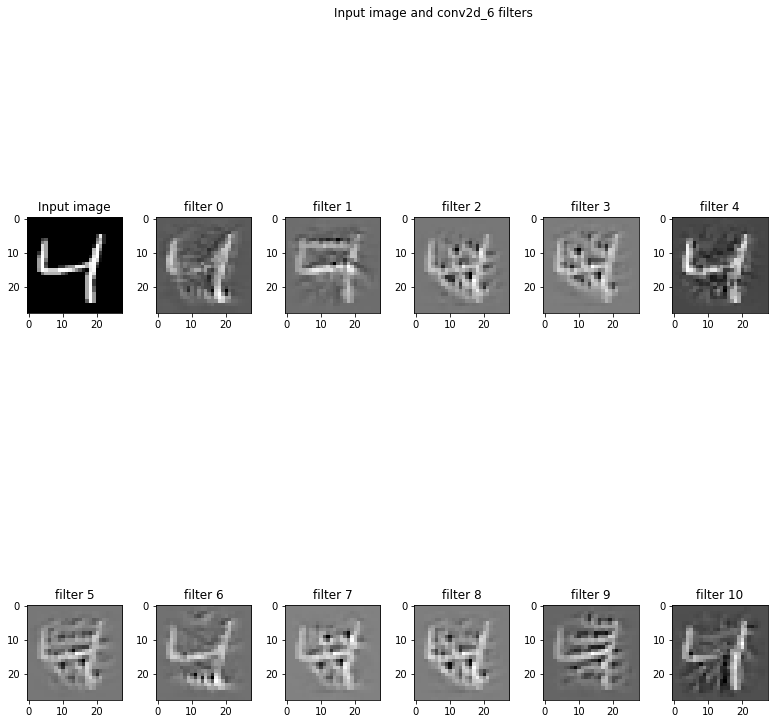

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_6'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()